# DATA ANALYSIS WITH PYTHON
# Modulo 3 - Exploratory Data Analysis


**Materia: Ciencia y analítica de datos**


**Nombre: Samuel Elias Flores Gonzalez**


**Matricula: A01793668**

El análisis exploratorio de datos es una aproximación al análisis de datos:

-Resume las caracteristicas principales de los datos, mejor entendimiento del dataset.

-descurbir relaciones entre diferentes variables

-Extraer variables importantes del problema que buscamos resolver.



Estadisticas descriptivas:

Cuando se comienza a analizar los datos es importante primero explorarlos antes de trabajar con modelos complicados. Por lo cual una manera de hacerlo es haciendo uso de la estadística descriptiva.

Esta misma nos ayuda a:

-Describir características básicas de los datos.

-Proveer cortos resumenes sobre las muestras y mediciones de los datos.



In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Almacenamos los datos en filename
path='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [4]:
#Le damos nombre a las columnas
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",             
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df = pd.read_csv(path, names = headers)   #Creamos el dataframe

In [6]:
df.head() #Mostramos el dataframe

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df.replace("?", np.nan, inplace = True)  #Remplazamos los simbolos por nan

In [9]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)     #Calculamos el promedio de la columna horsepower para sustituir los valores vacios
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)   #Remplazamos los datosa vacios por el promedio

Average horsepower: 104.25615763546799


In [10]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)           #Calculamos el promedio de la columna peak rmp para sustituir los valores vacios
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)     #Remplazamos los datosa vacios por el promedio

Average peak rpm: 5125.369458128079


In [11]:
df.dropna(subset=["price"], axis=0, inplace=True)  #Eliminamos todos los registros con datos vacios en precio


In [12]:
df.head()  #Mostramos el dataframe

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")      #Convertimos los datos para darle un formato adecuado
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")  

In [14]:
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


# **Descriptive Statistics**

In [15]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
drive_wheels_counts=df["drive-wheels"].value_counts()  #Value count nos sirve para saber cuantas unidades de cada variable tenemos
drive_wheels_counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [17]:
drive_wheels_counts.index.name="drive-wheels"      #Renombramos drive wheel
drive_wheels_counts

drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [18]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)          #Renombramos la columna por value counts
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


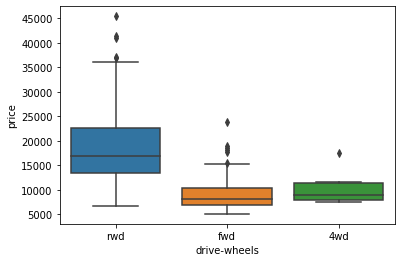

In [19]:
sns.boxplot(x="drive-wheels", y="price", data=df)  #Graficamos el box plot

Text(0, 0.5, 'Price')

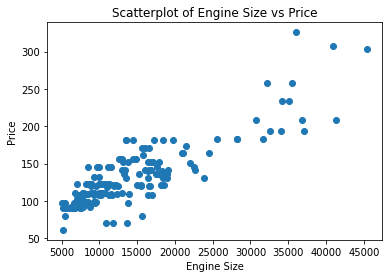

In [20]:
#Graficamos un scatterplot
#Podemos ver la relacion de dos variables continuas
#Predictor/independent variable en eje x
#Target/dependent variable en eje y

y=df["engine-size"]      #Definimos eje y como tamaño de motor                            
x=df["price"]           #Definimos eje x como precio
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# **Grouping data**

podemos agrupar los datos según las variables de interés

groupby() 

-puede ser aplicado en variables categoricas

-Grupos de datos en categoricas

In [21]:
# Escogemos 3 columnas de interes y las almacenamos en un df_test
df_test=df[["drive-wheels","body-style","price"]]
# Agrupa por variables
df_grp=df_test.groupby(["drive-wheels","body-style"],as_index=False).mean() 
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [22]:
# Transforma el grupo en un pivot table
df_pivot=df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

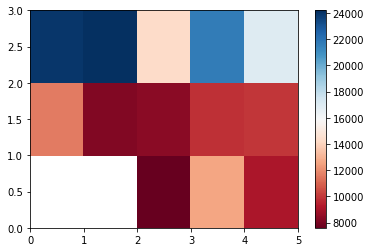

In [23]:
# Otra manera de respresentar el pivot table es usando un heatmap
#El heatmap es una buena manera de graficar la variable objetivo sobre otras variables 
#De esta manera se obtienen pistas visuales de las relaciones

plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

# **Analysis of Variance ANOVA**

Significa: Analysis Of Variance

Con este metodo podemos analizar las variables categóricas tales como "make".

Podemos encontrar la correlacion entre diferentes grupos de variables categóricas.

Regresa dos valores:

F-Test y P-Value

In [24]:
# Definimos el dataframe con las variables de interes
df_anova=df[["make","price"]]
# Agrupamos los datos de las diferentes marcas
grouped_anova=df_anova.groupby(["make"])

In [25]:
# Determinamos ANOVA para honda y subaru
anova_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

Podemos determinar con los resultados anteriores que el precio de honda y subaru no son significativamente diferentes ya que f-test es menor a 1 y p-value es mayor que 0.05

In [26]:
# Determinamos ANOVA para honda y jaguar
anova_results_2=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Los precios del honda y jaguar son significativamente diferentes ya que el valor de f-test es muy alto y p-value es mayor que 0.05

# **Correlation**

La correlaciones nos permiten saber en que medida una variables tiene efecto sobre una otra, de tal manera que si una aumenta la otra variable igualmente aumenta.

Un ejemplo podria ser:

Cáncer de pulmón y fumar, esto debido a que se sabe que fumar, aumenta las posibilidades de tener cancer de pulmón

(0.0, 53122.58922964651)

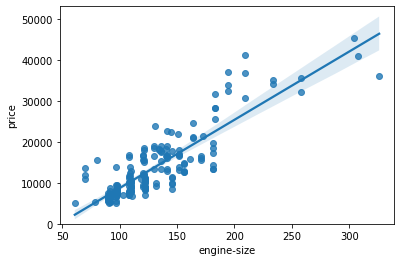

In [27]:
#Generamos y graficamos correlacion entre dos caracteristicascon una regresion lineal agregada

sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

Podemos observar que las variables tienen una relacion lineal positiva, es decir que si el tamaño del motor aumenta, el precio también

(0.0, 48150.21647572423)

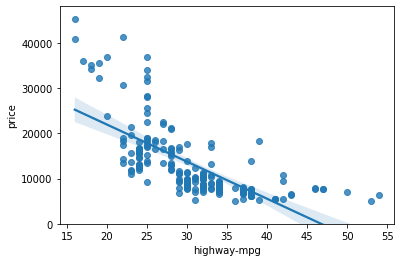

In [28]:
#Ahora utilizamos otra caracteristica con respecto al precio y graficamos
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

Observamos una relacion lineal negativa

(0.0, 47414.1)

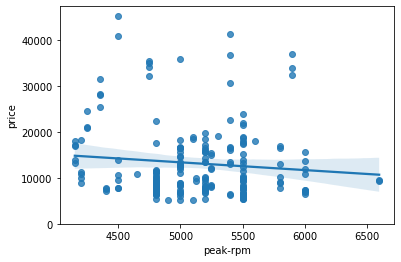

In [29]:
#Correlacion débil de caracteristicas
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

Observamos que que la correlacion entre variables es débil

# **Correlation - Statistics**

In [30]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.144324,-0.008245,-0.182196,0.279740,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.144324,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,-0.277060,-0.592655,-0.599218,0.543436
stroke,-0.008245,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,-0.065713,-0.034696,-0.035201,0.082310
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001250,0.187923,1.000000,-0.435780,0.331425,0.268465,0.071107


In [31]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)

In [32]:
#Procedemos a buscar la correlacion entre variables
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Question #1:
 
 What is the data type of the column "peak-rpm"? 

In [33]:
df["peak-rpm"].dtype

dtype('float64')

Question #2: 
Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]

In [34]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio
bore,1.00000,-0.055390,0.001250
stroke,-0.05539,1.000000,0.187923
compression-ratio,0.00125,0.187923,1.000000


Question 3 a): 
Find the correlation between x="stroke" and y="price".

Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].

In [35]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Question 3 b):
Given the correlation results between "price" and "stroke", do you expect a linear relationship?

Verify your results using the function "regplot()".

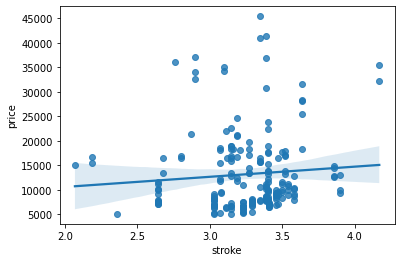

In [36]:
sns.regplot(x="stroke", y="price", data=df)